In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies=pd.read_csv('M2_T2_V1Movies.csv')
movies

,Title,Year,Genre,Duration,Director,Rating,Popularity
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58
...,...,...,...,...,...,...,...
5270,Bloodline,2018,Crime,97,Henry Jacobson,6.0,64.69
5271,The Princess Switch,2018,Comedy,101,Mike Rohl,6.0,80.21
5272,You Might Be the Killer,2018,Comedy,92,Brett Simmons,5.9,61.14
5273,The Final Wish,2018,Horror,95,Timothy Woodward Jr.,4.2,54.68


In [5]:
movies.describe()

,Year,Duration,Rating,Popularity
count,5275.000000,5275.000000,5275.000000,5275.000000
mean,2010.899526,95.235261,5.379981,50.009486
std,4.842039,12.771222,1.248103,28.870229
min,2001.000000,46.000000,1.100000,0.050000
25%,2007.000000,87.000000,4.600000,25.030000
50%,2012.000000,93.000000,5.500000,50.020000
75%,2015.000000,101.000000,6.300000,75.005000
max,2018.000000,219.000000,9.700000,100.000000


In [7]:
movies.Duration.sum()/len(movies.Duration)

95.2352606635071

In [8]:
movies.Rating.mean()

5.379981042654028

In [13]:
list(movies.Genre.value_counts().head(3).index)

['Comedy', 'Drama', 'Action']

In [18]:
top3=movies.Genre.value_counts().head(3).index

In [41]:
movies['topgenre']=np.where(movies.Genre.isin(top3),'y','n')

In [21]:
movies

,Title,Year,Genre,Duration,Director,Rating,Popularity,top genre
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83,y
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69,y
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08,y
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60,y
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58,y
...,...,...,...,...,...,...,...,...
5270,Bloodline,2018,Crime,97,Henry Jacobson,6.0,64.69,n
5271,The Princess Switch,2018,Comedy,101,Mike Rohl,6.0,80.21,y
5272,You Might Be the Killer,2018,Comedy,92,Brett Simmons,5.9,61.14,y
5273,The Final Wish,2018,Horror,95,Timothy Woodward Jr.,4.2,54.68,n


In [29]:
movies.loc[:,['Duration','Rating','top genre']].groupby('top genre').mean()

,Duration,Rating
top genre,,
n,93.668866,5.158188
y,95.958980,5.482456


In [42]:
movies.groupby('topgenre').mean()

,Year,Duration,Rating,Popularity
topgenre,,,,
n,2011.311938,93.668866,5.158188,48.073071
y,2010.708980,95.958980,5.482456,50.904166


In [45]:
movies.loc[movies.topgenre=='y',['Duration','Rating','Genre']].groupby("Genre").mean()

,Duration,Rating
Genre,,
Action,96.390146,4.838083
Comedy,94.711377,5.551317
Drama,97.441449,5.793260


C:\Users\purni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

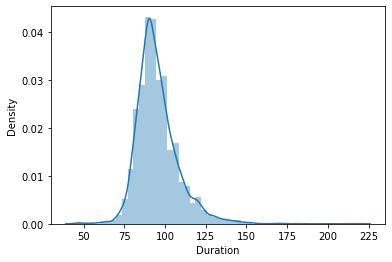

In [50]:
sns.distplot(movies.Duration)

In [51]:
movies.Duration.describe()

count    5275.000000
mean       95.235261
std        12.771222
min        46.000000
25%        87.000000
50%        93.000000
75%       101.000000
max       219.000000
Name: Duration, dtype: float64

In [55]:
top3genre=movies.loc[movies.topgenre=='y',['Duration','Genre']]

In [56]:
top3genre

,Duration,Genre
0,72,Drama
1,104,Drama
2,100,Comedy
3,88,Action
4,142,Action
...,...,...
5263,81,Comedy
5267,92,Drama
5268,74,Action
5271,101,Comedy


C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration', ylabel='Genre'>

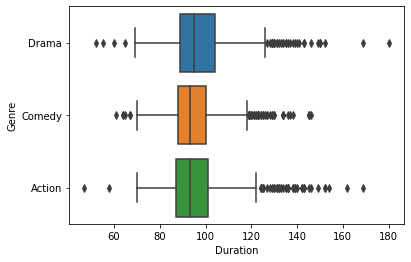

In [57]:
sns.boxplot(top3genre.Duration,top3genre.Genre)

In [2]:
hills=pd.read_csv("hills.csv")
hills

,dist,climb,time
0,2.5,650,16.083
1,6.0,2500,48.350
2,6.0,900,33.650
3,7.5,800,45.600
4,8.0,3070,62.267
5,8.0,2866,73.217
6,16.0,7500,204.617
7,6.0,800,36.367
8,5.0,800,29.750
9,6.0,650,39.750


In [3]:
hills.describe()

,dist,climb,time
count,35.000000,35.000000,35.000000
mean,7.528571,1815.314286,57.875714
std,5.523936,1619.150536,50.040716
min,2.000000,300.000000,15.950000
25%,4.500000,725.000000,28.000000
50%,6.000000,1000.000000,39.750000
75%,8.000000,2200.000000,68.625000
max,28.000000,7500.000000,204.617000


C:\Users\purni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dist', ylabel='Density'>

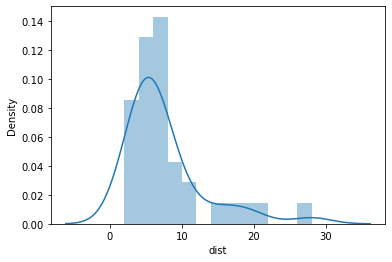

In [4]:
sns.distplot(hills.dist)

<AxesSubplot:xlabel='dist', ylabel='Density'>

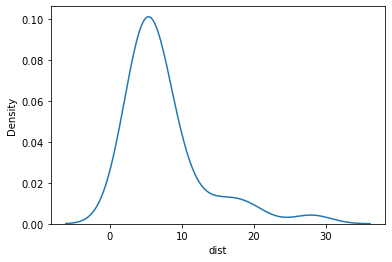

In [5]:
sns.kdeplot(hills.dist)

<AxesSubplot:xlabel='time', ylabel='Density'>

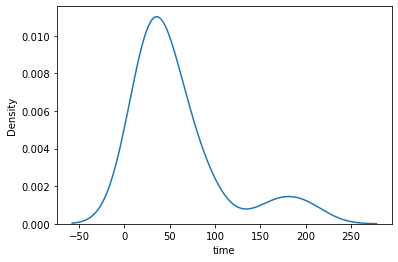

In [6]:
sns.kdeplot(hills.time)

<AxesSubplot:xlabel='dist', ylabel='time'>

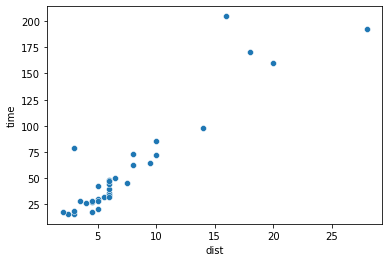

In [7]:
sns.scatterplot(x=hills.dist,y=hills.time)

<AxesSubplot:xlabel='climb', ylabel='time'>

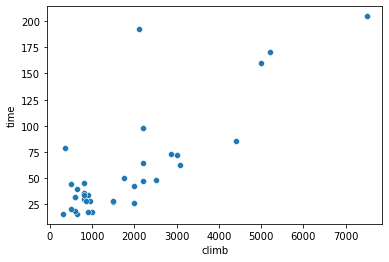

In [8]:
sns.scatterplot(x=hills.climb,y=hills.time)

<AxesSubplot:xlabel='time', ylabel='dist'>

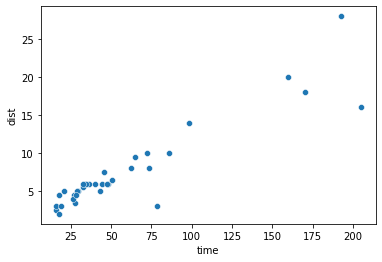

In [11]:
sns.scatterplot(y=hills.dist,x=hills.time)

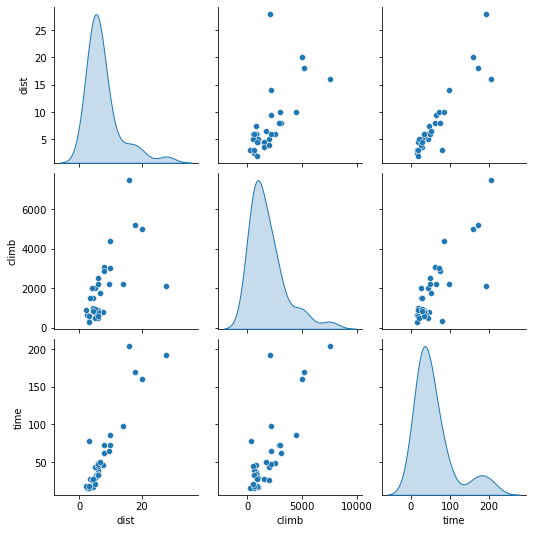

In [13]:
#pair plot
sns.pairplot(hills,diag_kind='kde')

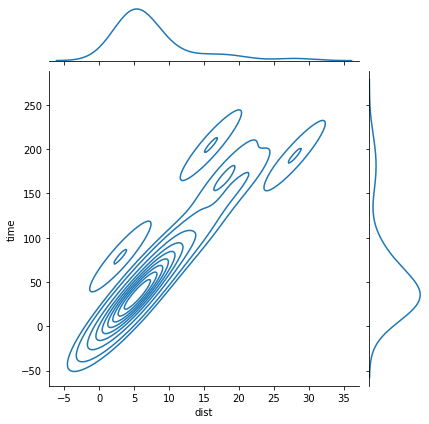

In [17]:
sns.jointplot(x=hills.dist,y=hills.time,kind='kde')

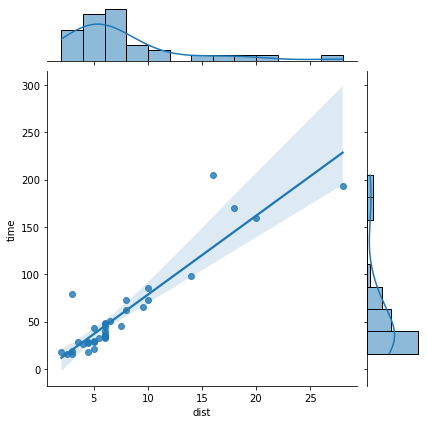

In [18]:
sns.jointplot(x=hills.dist,y=hills.time,kind='reg')

In [19]:
#covarience
hills.cov()

,dist,climb,time
dist,30.513866,5.834638e+03,254.194420
climb,5834.637815,2.621648e+06,65243.256739
time,254.194420,6.524326e+04,2504.073281


In [21]:
hills.var()

dist     3.051387e+01
climb    2.621648e+06
time     2.504073e+03
dtype: float64

In [26]:
covdh=((hills.dist-hills.dist.mean())*(hills.time-hills.time.mean())).sum()/34
covdh

254.1944201680672

In [27]:
covdt=((hills.dist-hills.dist.mean())*(hills.climb-hills.climb.mean())).sum()/34
covdt

5834.637815126051

In [28]:
#correlation
hills.corr()

,dist,climb,time
dist,1.000000,0.652346,0.919589
climb,0.652346,1.000000,0.805239
time,0.919589,0.805239,1.000000


In [33]:
corrdt=covdh/(hills.dist.std()*hills.time.std())
corrdt

0.9195892419137575